In [732]:
import matplotlib.pyplot as plt
import numpy as np

In [734]:
#a1: 1 down
#a2: 2 down
#a3: crossover
#a4: stay

In [735]:
def next_state_no_ped(state,action):
    if action == 'a4':
        return state
    elif action == 'a1':
        return (state[0]+1,state[1])
    elif action == 'a2':
        return (state[0]+2,state[1])
    elif action == 'a3':
        return (state[0]+1,1-state[1])
    else : return "Invalid action"
    
def reward_no_ped(state):
    if state[0]==6:
        return 100
    return 0

In [736]:
def next_state_ped(state,action):
    car = state[0]
    pedl = state[1]
    pedr = state[2]
    
    c_row = car[0]
    c_col = car[1]

    if action == 'a4':
        car_new = car
    elif action == 'a1':
        car_new = (c_row+1,c_col,1)
    elif action == 'a2':
        car_new = (c_row+2,c_col,2)
    elif action == 'a3':
        car_new = (c_row+1,1-c_col,1)
    else : return "Invalid action"
    
    pedl_step = np.random.choice([1,2])
    pedl_new = ((pedl[0]-pedl_step)%8,pedl_step)
    
    pedr_step = np.random.choice([1,2])
    pedr_new = ((pedr[0]+pedr_step)%8,pedr_step)
    
    new_state = (car_new,pedl_new,pedr_new)
    
    if(reward(new_state)==0):
        return((new_state[0][0],new_state[0][1],1),(new_state[1][0],1),(new_state[2][0],1))
        
    
    return new_state

def reward_ped(state):
    car = state[0]
    pedl = state[1]
    pedr = state[2]
    
    if car[0]==6:
        return 100
    
    car_pos = [(car[0],3+car[1])]
    if(car[2]==2):
        car_pos.append((car[0]-1,3+car[1]))
#     print(car_pos)
        
    ped_pos = [(3,pedl[0]),(4,pedr[0])]
    
    if(pedl[1]==2):
        ped_pos.append((3,(pedl[0]+1)%8))
        
    if(pedr[1]==2):
        ped_pos.append((4,(pedr[0]-1)%8))
#     print(ped_pos)
        
    for c in car_pos:
        if c in ped_pos:
            return -100
    
    return 0

In [737]:
def get_best_action(state,Q,ped=False):
    A1 = ['a1','a3','a4']
    A2 = ['a1','a2','a3','a4']
    if ped:
        if(state[0][0]==5): actions = A1
        else: actions = A2    
    else:
        if(state[0]==5): actions = A1
        else: actions = A2
        
    bestQ = -np.inf
    for act in actions:
        if Q[state][act] > bestQ:
            bestQ = Q[state][act]
            besta = act
    return besta, bestQ

def take_action(state, Q, e, ped):
    if(state[0]==6): return "Terminal state"
    A1 = ['a1','a3','a4']
    A2 = ['a1','a2','a3','a4']
    if ped:
        if(state[0][0]==5): actions = A1
        else: actions = A2    
    else:
        if(state[0]==5): actions = A1
        else: actions = A2
    
    choose = np.random.choice(['best','random'],p=[1-e,e])
    besta, bestQ = get_best_action(state,Q,ped)
    
    if choose=='best':
        return besta
    else:
        return np.random.choice([a for a in actions if a != besta])

In [789]:
def check(Q, state):
    if state not in Q:
        Q[state] = {'a1': 0, 'a2': 0, 'a3': 0, 'a4': 0}
    
def set_terminal(Q, state,reward):
    Q[state] = {'a1': reward, 'a2': reward, 'a3': reward, 'a4': reward}
    return Q[state]

def Qlearning(Q, alpha=0.1, max_iter=10000,ped = False):
    if ped: 
        track_state = ((2,0,1),(6,1),(0,1))
        reward = reward_ped
        next_state  = next_state_ped
    else: 
        track_state = (2,0)
        reward = reward_no_ped
        next_state  = next_state_no_ped
        
    for i in range(max_iter):
        e = 0.4 - (0.3*i)/max_iter
        if(ped): 
            s= ((0,np.random.randint(0, 2),1), (np.random.randint(0, 8), 1), (np.random.randint(0, 8), 1))
        else : 
            s = (0,np.random.choice([0,1]))
        check(Q, s)
        
        while True:
            r = reward(s)
            if r != 0:
                set_terminal(Q, s, r)
                break
            
            a = take_action(s, Q, e, ped)
            next_s = next_state(s, a)
            check(Q, next_s)

            best_an, best_qn = get_best_action(next_s, Q, ped)
            
            update = alpha*(r + gamma*best_qn - Q[s][a])
            #if(update > 0 and update < 0.00001):break
            Q[s][a] = Q[s][a] + update
            
            if(s==track_state):
                if a=='a1':traj_a1.append(Q[s][a])
                if a=='a2':traj_a2.append(Q[s][a])
                if a=='a3':traj_a3.append(Q[s][a])
                if a=='a4':traj_a4.append(Q[s][a])
            s = next_s
        #break
        
    return Q

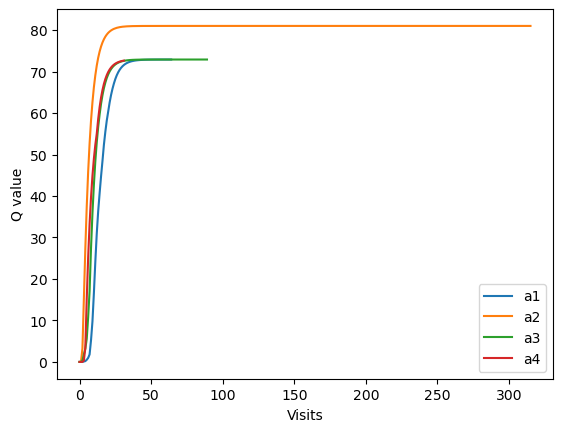

In [792]:
Q = {}
traj_a1=[0]
traj_a2=[0]
traj_a3=[0]
traj_a4=[0]
gamma = 0.9
Qlearning(Q,0.2,1000,False)

plt.plot(traj_a1,label = 'a1')
plt.plot(traj_a2,label = 'a2')
plt.plot(traj_a3,label = 'a3')
plt.plot(traj_a4,label = 'a4')


plt.ylabel("Q value")
plt.xlabel("Visits")

plt.legend()
plt.show()

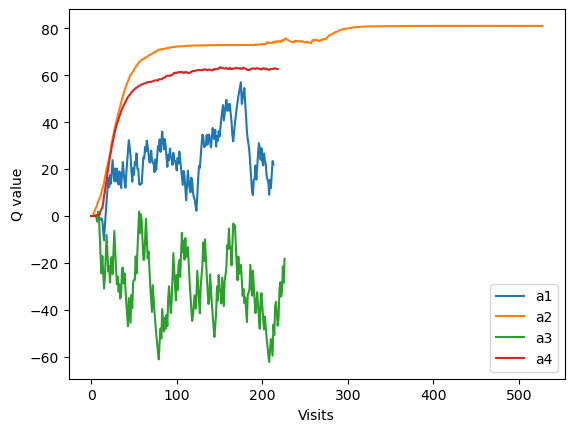

In [788]:
Q={}
traj_a1=[0]
traj_a2=[0]
traj_a3=[0]
traj_a4=[0]
gamma = 0.9
Qlearning(Q,0.1,500000,True)

plt.plot(traj_a1,label = 'a1')
plt.plot(traj_a2,label = 'a2')
plt.plot(traj_a3,label = 'a3')
plt.plot(traj_a4,label = 'a4')


plt.ylabel("Q value")
plt.xlabel("Visits")

plt.legend()
plt.show()